# Regression Challenge

 Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

- In this challenge, I used a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

- Citation: The data used in this exercise originates from the following study:

- Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.

- It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science).

In [1]:
#import the necessary libraties
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#loading the datasset

#!wget https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/ee7bccccf5dd1a95f9d547b2e9e5fd68f61fe02e/challenges/data/real_estate.csv

dataset = pd.read_csv("real_estate.csv")
dataset.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- transaction_date - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- house_age - the house age (in years)
- transit_distance - the distance to the nearest light rail station (in meters)
- local_convenience_stores - the number of convenience stores within walking distance
- latitude - the geographic coordinate, latitude
- longitude - the geographic coordinate, longitude
- price_per_unit house price of unit area (3.3 square meters)

In [2]:
#Taking a look at the dataset information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


#### since there are no null values, let's make a copy of the dataset to begin the data wrangling process

In [3]:
#making a copy
data = dataset.copy()

In [4]:
#split the transaction_date column into year and month
data['transaction_year'] = data['transaction_date'] // 1
data['transaction_month'] = data['transaction_date'] % 1

In [5]:
#checking if the transaction_date column column was splitted correctly by taking a sample of 10

data[['transaction_date', 'transaction_year', 'transaction_month']].sample(10)

,transaction_date,transaction_year,transaction_month
195,2013.333,2013.0,0.333
319,2013.250,2013.0,0.250
345,2012.667,2012.0,0.667
402,2012.833,2012.0,0.833
51,2013.083,2013.0,0.083
242,2012.833,2012.0,0.833
150,2013.250,2013.0,0.250
309,2013.250,2013.0,0.250
388,2013.500,2013.0,0.500
362,2013.417,2013.0,0.417


In [6]:
#convert the year into integer
data['transaction_year'] = data['transaction_year'].astype('int')

#multiply the month column by 12
data['transaction_month'] = (data['transaction_month'] * 12).apply(np.ceil)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
 7   transaction_year          414 non-null    int32  
 8   transaction_month         414 non-null    float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 27.6 KB


In [8]:
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,transaction_year,transaction_month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,12.0
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,12.0
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7.0
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6.0
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10.0


In [9]:
#checking the summary statistics of the dataframe

data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,transaction_year,transaction_month
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,2012.695652,5.804348
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.460687,3.538495
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,2012.000000,0.000000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,2012.000000,3.000000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,2013.000000,6.000000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,2013.000000,9.000000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000,12.000000


- From the above summary statistics, it is visible that after the splitting and conversion of the transaction_date column, there were months with 0.0 as value, and which isn't possible. Hence there would be need to drop them 

In [10]:
#taking look at 10 sample of the dataframe

data.sample(10)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,transaction_year,transaction_month
282,2012.917,2.0,1455.7980,1,24.95120,121.54900,25.6,2012,12.0
394,2013.500,32.6,4136.2710,1,24.95544,121.49630,24.7,2013,6.0
71,2013.083,35.5,640.7391,3,24.97563,121.53715,40.8,2013,1.0
91,2013.250,9.1,1402.0160,0,24.98569,121.52760,43.2,2013,3.0
198,2013.083,34.0,157.6052,7,24.96628,121.54196,39.1,2013,1.0
85,2012.750,0.0,338.9679,9,24.96853,121.54413,50.8,2012,9.0
100,2013.500,17.5,964.7496,4,24.98872,121.53411,38.2,2013,6.0
336,2012.833,5.1,1867.2330,2,24.98407,121.51748,35.6,2012,10.0
173,2013.083,41.3,401.8807,4,24.98326,121.54460,35.1,2013,1.0
55,2012.833,31.7,1160.6320,0,24.94968,121.53009,13.7,2012,10.0


In [11]:
#checking the number of rows with month value of 0.0

len(data[data['transaction_month'] == 0.0])

28

In [12]:
#dropping the rows with month value of 0.0

data.drop(data.loc[data['transaction_month'] == 0.0].index, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          386 non-null    float64
 1   house_age                 386 non-null    float64
 2   transit_distance          386 non-null    float64
 3   local_convenience_stores  386 non-null    int64  
 4   latitude                  386 non-null    float64
 5   longitude                 386 non-null    float64
 6   price_per_unit            386 non-null    float64
 7   transaction_year          386 non-null    int32  
 8   transaction_month         386 non-null    float64
dtypes: float64(7), int32(1), int64(1)
memory usage: 28.6 KB


In [14]:
#splitting the house_age into year and month
data['house_year'] = data['house_age'] // 1

#multiply the month column by 10 to represent 
data['house_month'] = ((data['house_age'] % 1) * 10)

In [15]:
data.sample(15)

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,transaction_year,transaction_month,house_year,house_month
70,2013.583,6.6,90.45606,9,24.97433,121.54310,59.0,2013,7.0,6.0,6.0
288,2013.583,16.6,323.69120,6,24.97841,121.54280,51.0,2013,7.0,16.0,6.0
27,2013.250,10.4,276.44900,5,24.95593,121.53913,33.6,2013,3.0,10.0,4.0
360,2012.667,32.9,87.30222,10,24.98300,121.54022,47.1,2012,9.0,32.0,9.0
171,2013.083,3.6,383.86240,5,24.98085,121.54391,58.8,2013,1.0,3.0,6.0
122,2013.250,31.5,414.94760,4,24.98199,121.54464,32.5,2013,3.0,31.0,5.0
108,2013.417,31.4,592.50060,2,24.97260,121.53561,34.1,2013,6.0,31.0,4.0
403,2012.667,30.9,161.94200,9,24.98353,121.53966,39.7,2012,9.0,30.0,9.0
29,2013.083,7.1,451.24380,5,24.97563,121.54694,57.1,2013,1.0,7.0,1.0
235,2012.750,12.9,250.63100,7,24.96606,121.54297,39.3,2012,9.0,12.0,9.0


- It was observed that some rows have house year and house month value of 0.0 which means that the building isn't up to a month not to talk of being a year. Taking look of the entries would be a best option

In [16]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,transaction_year,transaction_month,house_year,house_month
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,2013.159777,17.705181,1040.465691,4.189119,24.969658,121.533364,38.482383,2012.673575,6.225389,17.287565,4.176166
std,0.289062,11.560680,1209.435422,2.925568,0.011923,0.014942,13.594598,0.469513,3.286885,11.504836,2.946281
min,2012.667000,0.000000,23.382840,0.000000,24.932930,121.473530,7.600000,2012.000000,1.000000,0.000000,0.000000
25%,2012.917000,8.500000,289.324800,1.000000,24.963072,121.528085,28.425000,2012.000000,3.000000,8.000000,2.000000
50%,2013.167000,16.050000,492.231300,4.000000,24.971990,121.538440,39.200000,2013.000000,6.000000,16.000000,4.000000
75%,2013.417000,28.550000,1445.109250,6.000000,24.978093,121.543267,47.000000,2013.000000,9.000000,28.000000,7.000000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000,12.000000,43.000000,9.000000


In [17]:
#taking a look at rows with house_year and house_month value of 0.0

data[(data['house_year'] == 0.0) & (data['house_month'] == 0.0)]

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,transaction_year,transaction_month,house_year,house_month
16,2013.250,0.0,292.9978,6,24.97744,121.54458,70.1,2013,3.0,0.0,0.0
85,2012.750,0.0,338.9679,9,24.96853,121.54413,50.8,2012,9.0,0.0,0.0
90,2012.833,0.0,274.0144,1,24.97480,121.53059,45.4,2012,10.0,0.0,0.0
103,2012.750,0.0,208.3905,6,24.95618,121.53844,45.7,2012,9.0,0.0,0.0
105,2012.833,0.0,292.9978,6,24.97744,121.54458,71.0,2012,10.0,0.0,0.0
123,2013.417,0.0,185.4296,0,24.97110,121.53170,45.5,2013,6.0,0.0,0.0
146,2012.750,0.0,185.4296,0,24.97110,121.53170,52.2,2012,9.0,0.0,0.0
164,2012.833,0.0,185.4296,0,24.97110,121.53170,55.2,2012,10.0,0.0,0.0
166,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6,2013,6.0,0.0,0.0
211,2013.083,0.0,274.0144,1,24.97480,121.53059,43.5,2013,1.0,0.0,0.0


In [18]:
# year = pd.get_dummies(data['transaction_year'])

In [19]:
#concating the dummy column with the original dataset and drop the transaction_year column

# data = pd.concat([data, year], axis=1).drop(['transaction_year'], axis=1)

In [20]:
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,transaction_year,transaction_month,house_year,house_month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,12.0,32.0,0.0
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,12.0,19.0,5.0
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7.0,13.0,3.0
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6.0,13.0,3.0
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10.0,5.0,0.0


In [21]:
data.dtypes

transaction_date            float64
house_age                   float64
transit_distance            float64
local_convenience_stores      int64
latitude                    float64
longitude                   float64
price_per_unit              float64
transaction_year              int32
transaction_month           float64
house_year                  float64
house_month                 float64
dtype: object

In [22]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,transaction_year,transaction_month,house_year,house_month
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,2013.159777,17.705181,1040.465691,4.189119,24.969658,121.533364,38.482383,2012.673575,6.225389,17.287565,4.176166
std,0.289062,11.560680,1209.435422,2.925568,0.011923,0.014942,13.594598,0.469513,3.286885,11.504836,2.946281
min,2012.667000,0.000000,23.382840,0.000000,24.932930,121.473530,7.600000,2012.000000,1.000000,0.000000,0.000000
25%,2012.917000,8.500000,289.324800,1.000000,24.963072,121.528085,28.425000,2012.000000,3.000000,8.000000,2.000000
50%,2013.167000,16.050000,492.231300,4.000000,24.971990,121.538440,39.200000,2013.000000,6.000000,16.000000,4.000000
75%,2013.417000,28.550000,1445.109250,6.000000,24.978093,121.543267,47.000000,2013.000000,9.000000,28.000000,7.000000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,2013.000000,12.000000,43.000000,9.000000


## Data Exploration/Visualization

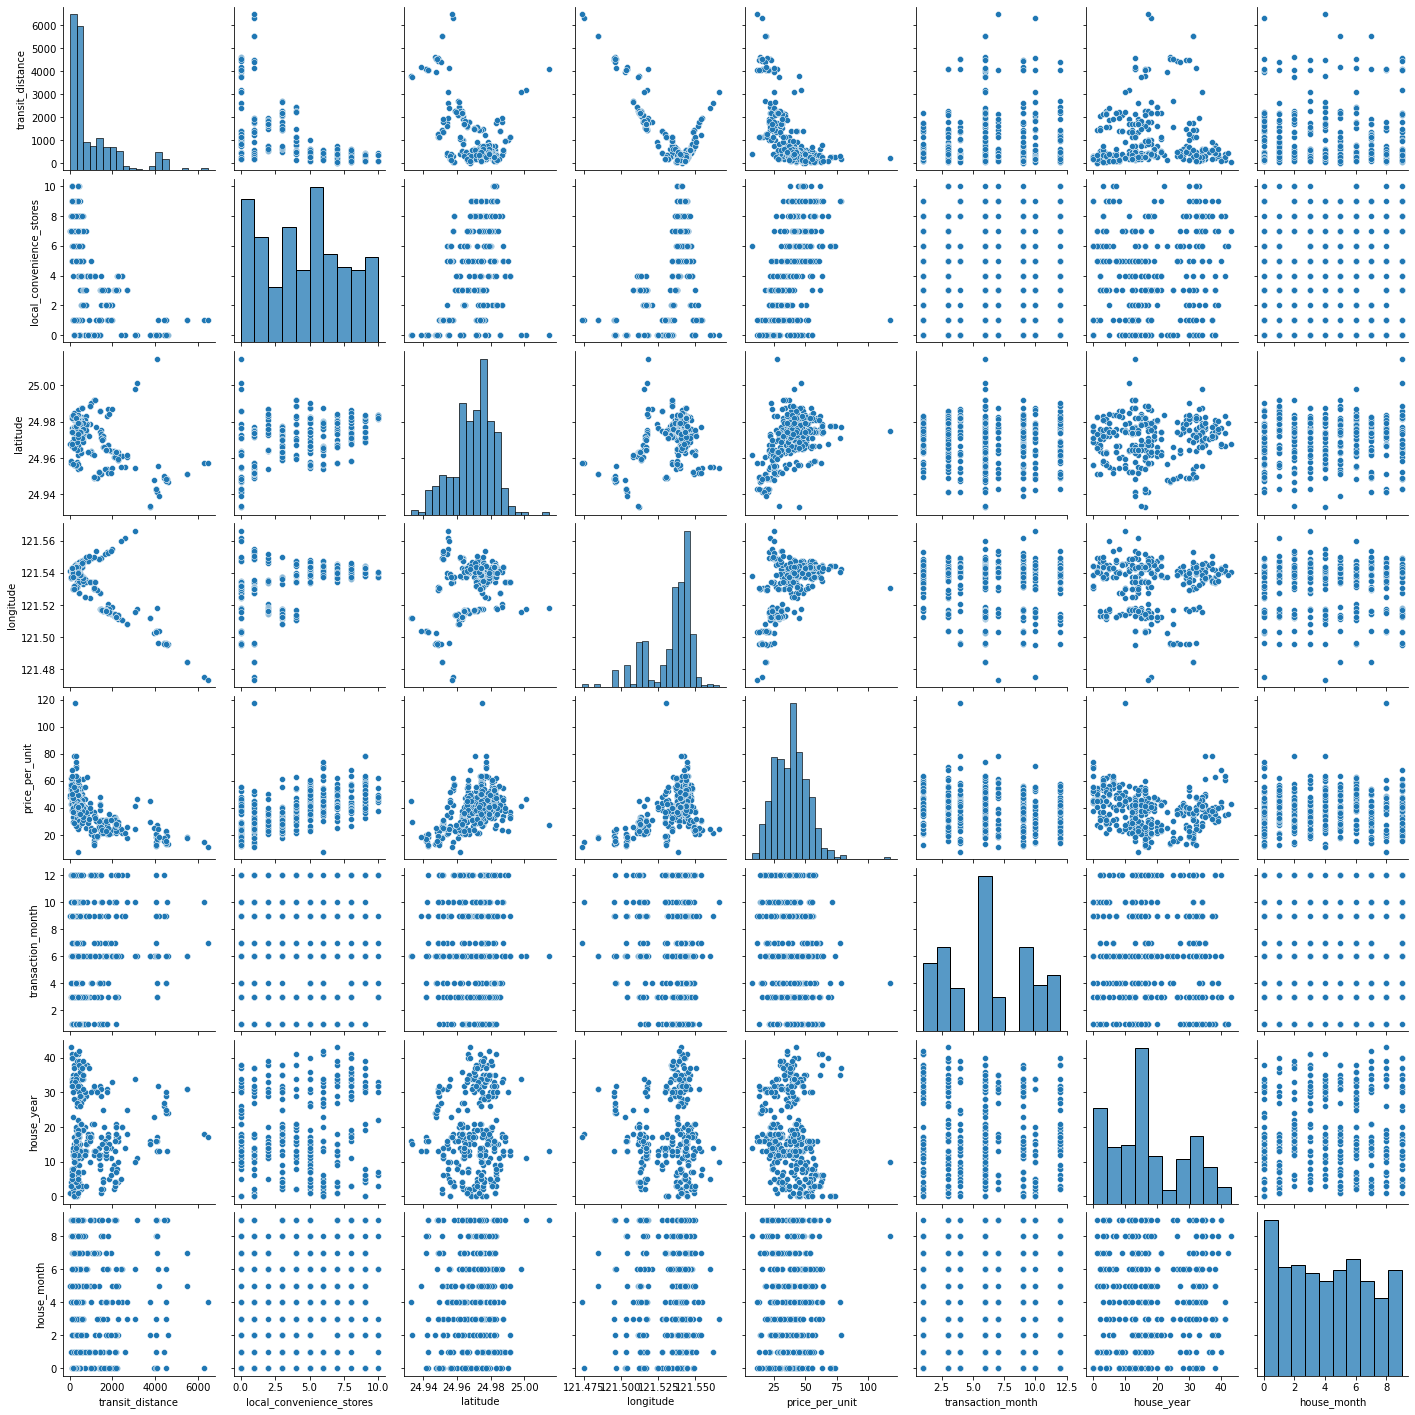

In [23]:
sns.pairplot(data[['transit_distance','local_convenience_stores','latitude','longitude','price_per_unit','transaction_month','house_year','house_month']])

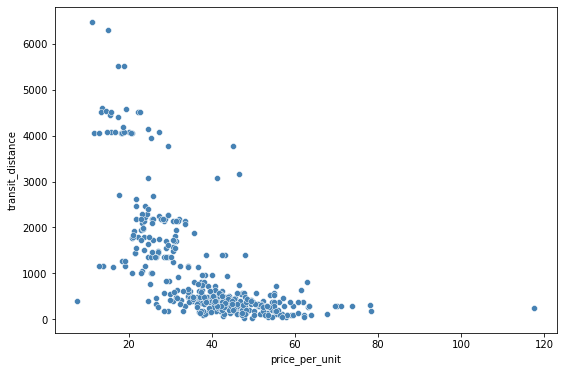

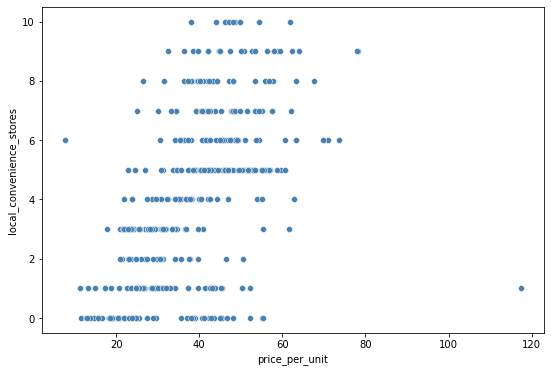

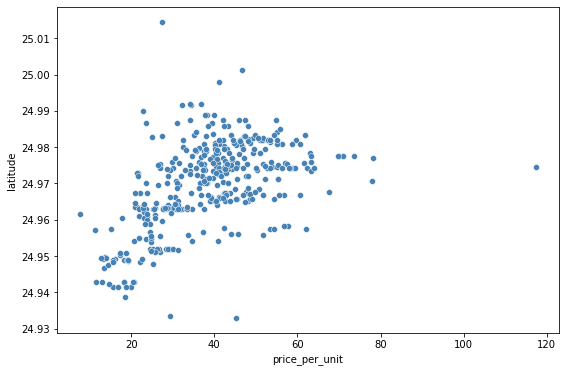

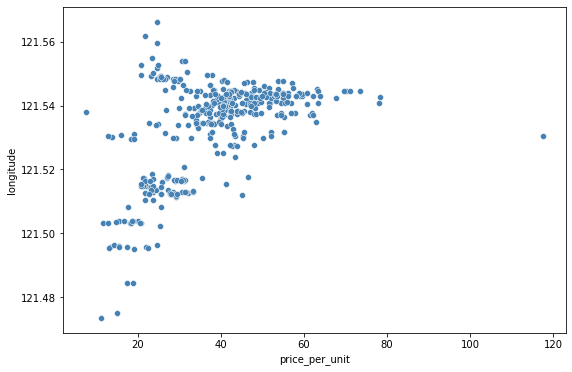

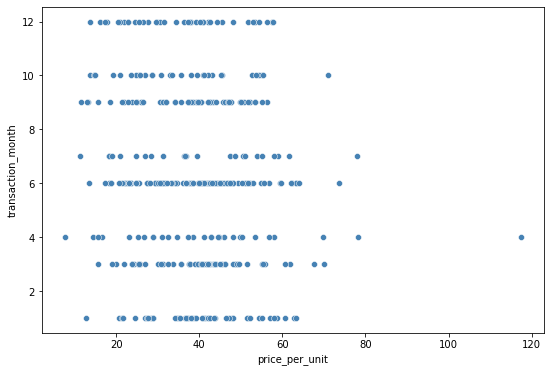

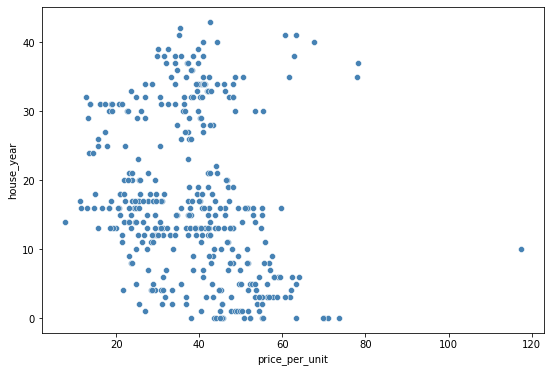

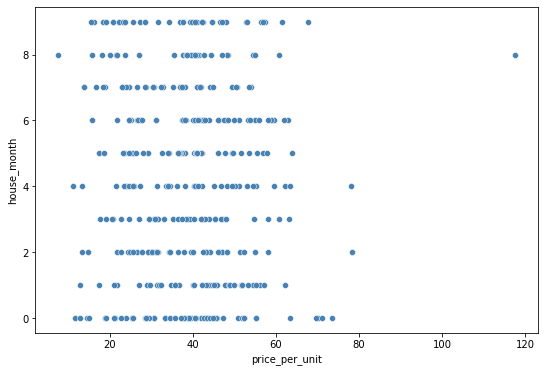

In [24]:
columns = ['transit_distance','local_convenience_stores','latitude','longitude','transaction_month','house_year','house_month']

for i in range(len(columns)):
    fig = plt.figure(figsize=(9, 6))
    #feature = data[columns[i]]
    sns.scatterplot(x = data['price_per_unit'], y = data[columns[i]], color='steelblue')
    

c:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_unit'>

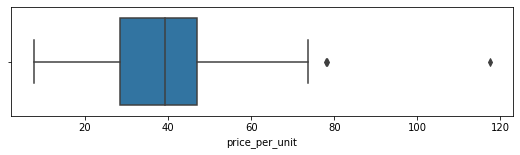

In [25]:
plt.figure(figsize=(9,2))
sns.boxplot(data['price_per_unit'])

In [26]:
# dropping outliers

data = data[data['price_per_unit']<70]

### Taking a view of the numerical correlation

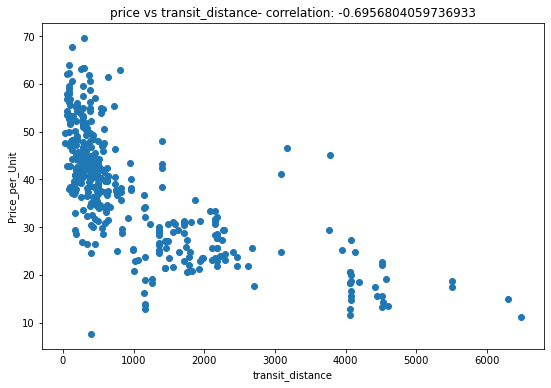

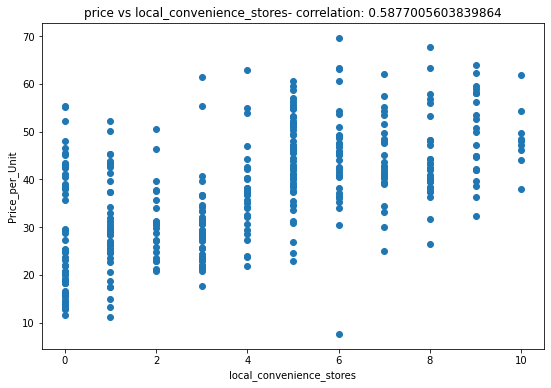

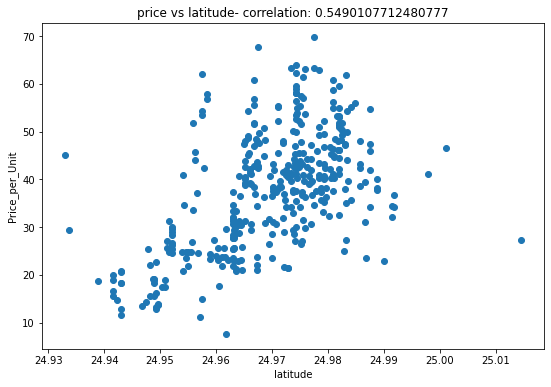

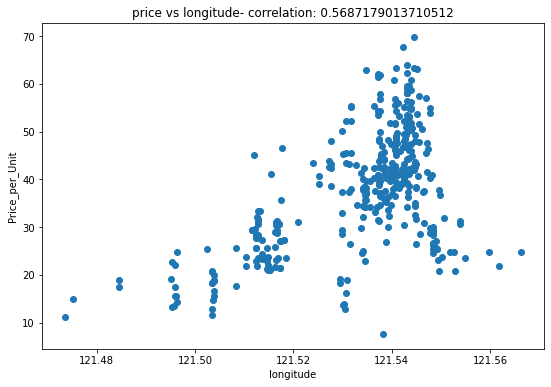

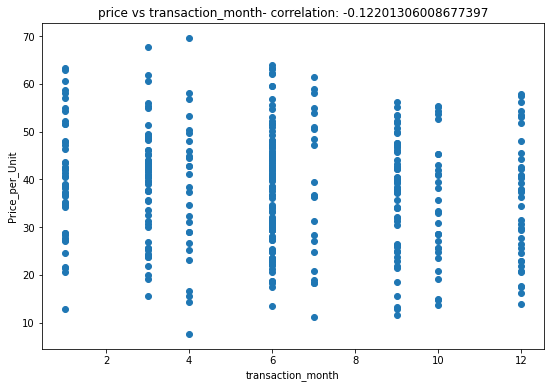

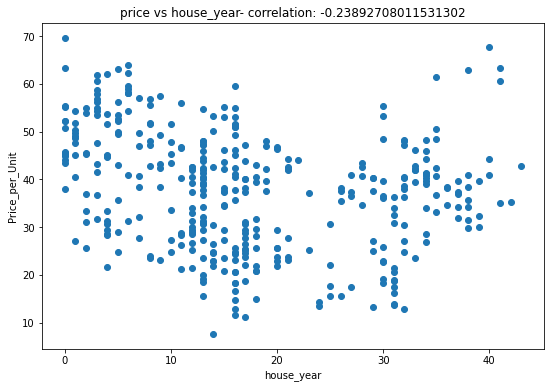

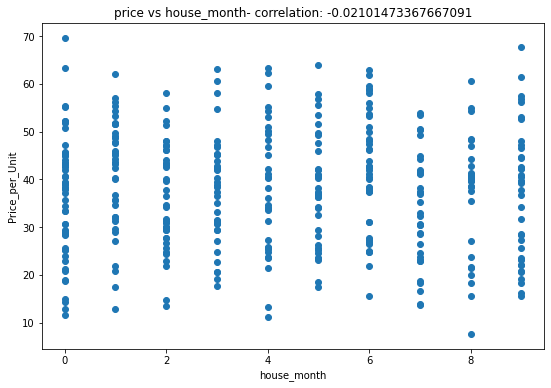

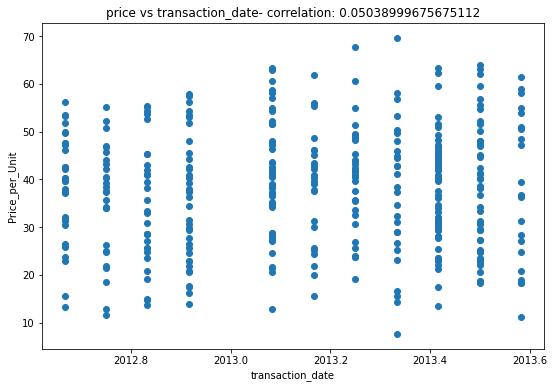

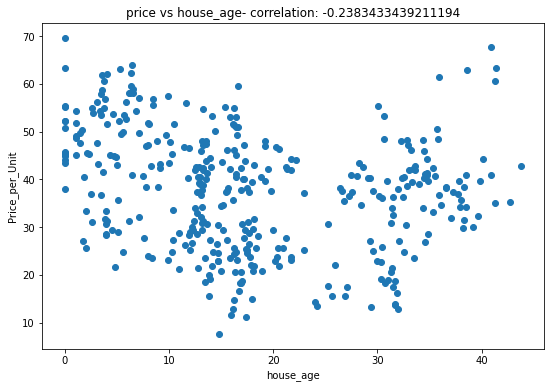

In [27]:
column = ['transit_distance','local_convenience_stores','latitude','longitude','transaction_month','house_year','house_month','transaction_date','house_age']
for col in column:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price_per_Unit')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
plt.show()

### Importing Machine Learning Models

In [28]:
#importing the machine learning models needed

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error



### Split the Dataset into Training and Testing set

In [29]:
X = data[['transit_distance','local_convenience_stores','latitude','longitude', 'transaction_year', 'transaction_month','house_year','house_month']]
y = data['price_per_unit']
# X = dataset[['transaction_date','house_age','transit_distance','local_convenience_stores','latitude','longitude']]
# y = dataset['price_per_unit']
#splitting the dataset into training and testing set

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state = 0)

In [30]:
#using a linear regression model

model = LinearRegression().fit(X_train,y_train)
print(model)

LinearRegression()


In [31]:
predictions = model.predict(X_test)

#checking the mean_squared_error value
mse = mean_squared_error(y_test,predictions)
print('mse: ', mse)

#checking the r2 score
r2 = r2_score(y_test,predictions)
print('r2_score: ',r2)

mse:  62.15516256727349
r2_score:  0.6372206314304488


In [32]:
#Using a lasso model

model = Lasso().fit(X_train, y_train)
predictions = model.predict(X_test)

#checking the mean_squared_error value
mse = mean_squared_error(y_test,predictions)
print('mse: ', mse)

#checking the r2 score
r2 = r2_score(y_test,predictions)
print('r2_score: ',r2)

mse:  70.10181777808825
r2_score:  0.5908386023190451


RandomForestRegressor() 

MSE: 36.00702705720452
RMSE: 6.000585559527046
R2: 0.7898387519179744


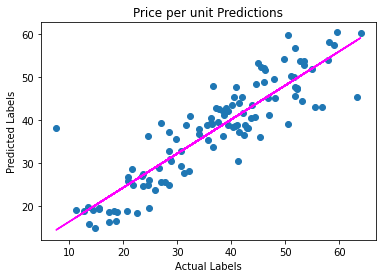

In [33]:
# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 35.923892404773085
RMSE: 5.993654344786083
R2: 0.7903239817117615


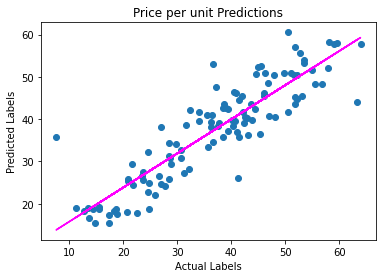

In [34]:
#Using a gradient boosting algorithm

# Train the model
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


Best Parameter Combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 35.27081522312474
RMSE: 5.938923742827883
R2: 0.7941357797635988


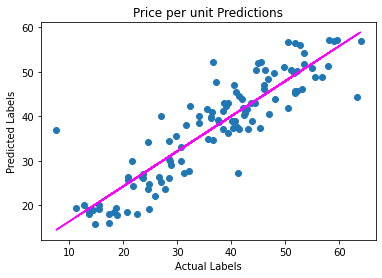

In [35]:
#using a Gradient Boosting algorithm

alg = GradientBoostingRegressor()

#Trying different hyperparameter values
params = {
    'learning_rate':[0.1,0.5,1.0],
    'n_estimators': [50,100,150]
}

#find the best hyperparameter combinatiion to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)

print("Best Parameter Combination:", gridsearch.best_params_, "\n")

#Get the best model
model = gridsearch.best_estimator_
print(model, "\n")

#Evaluate the model using the test data
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Preprocessing the data and train the model in a pipeline

MSE: 34.92269053359915
RMSE: 5.9095423286071105
R2: 0.7961676697922488


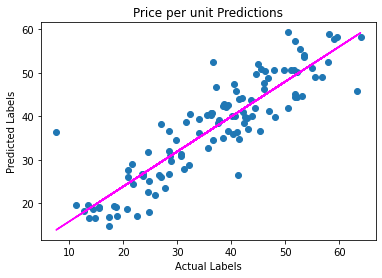

In [36]:
#Define preprocessing for numerical columns

numeric_features = [0,2,3,5,6,7]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# #Define preprocessing for categorical features
categorical_features = [1,4]
categorical_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

#combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
('cat', categorical_transformer, categorical_features)])


#create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
('regressor', GradientBoostingRegressor())])

#fit the pipeline to train a linear regression model
model1 = pipeline.fit(X_train, (y_train))

#make predictions
predictions = model1.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

MSE: 36.4511825686885
RMSE: 6.037481475639367
R2: 0.7872463613691049


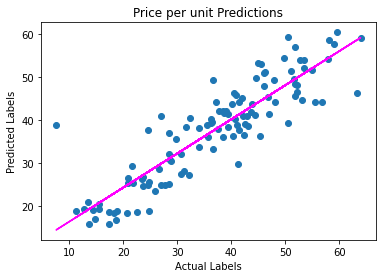

In [37]:


#create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
('regressor', RandomForestRegressor())])

#fit the pipeline to train a linear regression model
model = pipeline.fit(X_train, (y_train))

#make predictions
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per unit Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

In [38]:
import joblib

# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model1, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[289.3248,5,24.98203,121.54348,2013,2,16,2],
                  [4082.015,0,24.94155,121.5038,2013,0,13,6]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
50.45
19.84
